In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df_train_raw = pd.read_csv('data/customer_churn_dataset-testing-master.csv')
df_test_raw = pd.read_csv('data/customer_churn_dataset-testing-master.csv')
df_train_raw.columns = ['id', 'age', 'gender', 'tenure', 'frequency', 'calls', 'delay', 
                        'subscription', 'contractlength', 'spend', 'lastinteraction', 'churn']
df_test_raw.columns = ['id', 'age', 'gender', 'tenure', 'frequency', 'calls', 'delay', 
                       'subscription', 'contractlength', 'spend', 'lastinteraction', 'churn']

In [2]:
len(df_train_raw)/(len(df_train_raw) + len(df_test_raw))

0.8725789626826231

Dataset is split ~87% training, ~13% testing

##### Fields (with assumptions of interpretation):
    
* Customer ID
* Age - customer's age
* Gender - customer's gender
* Tenure - how long the customer has been on the product (maybe in months)
* Usage Frequency - how often the product is used on a certain time cadence (maybe number of days in a month)
* Support Calls - number of support calls customer had with company
* Payment Delay - number of days customer was late in paying for the product
* Subscription Type - the plan the customer's on
* Contract length - contract type
* Total Spend - amount customer spent
* Last Interaction - number of days since last interaction with customer
* Churn - whether the customer churned or not

## Data Cleaning 

### Training Set Cleaning

In [3]:
# check if id is unique - number of rows is 1 greater than number of unique ids
df_train_raw['id'].nunique()
len(df_train_raw)

440833

In [4]:
# check for blank rows, any NAs/blanks

In [5]:
# check for any entry that's null
df_train_raw.isnull().values.any()

True

In [6]:
# check which columns have null values
df_train_raw.isnull().any()

id                 True
age                True
gender             True
tenure             True
frequency          True
calls              True
delay              True
subscription       True
contractlength     True
spend              True
lastinteraction    True
churn              True
dtype: bool

In [7]:
# check how many rows for each column have null values
df_train_raw.isnull().sum()

id                 1
age                1
gender             1
tenure             1
frequency          1
calls              1
delay              1
subscription       1
contractlength     1
spend              1
lastinteraction    1
churn              1
dtype: int64

In [8]:
df_train_raw[df_train_raw.isnull().any(axis=1)]
# All of Row 199295 is empty. Remove it

,id,age,gender,tenure,frequency,calls,delay,subscription,contractlength,spend,lastinteraction,churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_train = df_train_raw.drop(199295)

Now that the one empty row is removed, the number of unique customer ids matches the total number of rows. Next, check each field's distinct values to ensure data types are consistent and no other data quality issues found. 

In [10]:
df_train['delay'].unique()

array([18.,  8.,  7., 26., 16., 15.,  4., 11., 30., 25., 13., 22.,  5.,
       14.,  3., 10., 28.,  2.,  6., 27., 12., 29., 17., 24.,  9., 23.,
       21.,  1.,  0., 20., 19.])

The one empty row was the only cleaning done - all other fields are fine. Now we move to the test set.

### Test Set Cleaning

In [11]:
df_test_raw['id'].nunique()
len(df_test_raw)
# the number of rows matches the number of unique customers - no blank ids here

64374

In [12]:
df_test_raw.isnull().values.any()

True

Similar as with the training set, check for unique values for each field to see if there are missing/inconsistent values.

#### Age

In [13]:
#check each field to see distinct values to see whether there's null and what needs to be cleaned
df_test_raw['age'].unique()

array(['22', '41', '47', '35', '53', '30', '54', '36', '65', '46', '56',
       '31', '42', '59', '29', '45', '62', '48', '55', '64', '25', '44',
       '28', '34', '24', '27', '61', '57', '37', '51', '18', '23', '60',
       '40', '26', '52', nan, '43', '19', '58', '33', '20', '39', '32',
       '38', '21', '63', '49', '50', 'Twenty-nine', '0', 'sixty',
       'forty-seven', 'fifty eight', 'twenty five', 'twenty seven',
       'forty six'], dtype=object)

In [14]:
# correct age that are in text form vs as a number
non_numeric_ages = df_test_raw[df_test_raw['age'].astype(str).str.contains(r'[^0-9]', na=True)]
df_test_raw.loc[df_test_raw['age'] == 'Twenty-nine','age'] = 29
df_test_raw.loc[df_test_raw['age'] == 'sixty','age'] = 60
df_test_raw.loc[df_test_raw['age'] == 'forty-seven','age'] = 47
df_test_raw.loc[df_test_raw['age'] == 'fifty eight','age'] = 58
df_test_raw.loc[df_test_raw['age'] == 'twenty five','age'] = 25
df_test_raw.loc[df_test_raw['age'] == 'twenty seven','age'] = 27
df_test_raw.loc[df_test_raw['age'] == 'forty six','age'] = 46

In [15]:
# df_test_raw['age'].value_counts(normalize=True) * 100

In [16]:
df_test_raw[df_test_raw['age'].astype(str).str.contains(r'[^0-9]', na=True)]

,id,age,gender,tenure,frequency,calls,delay,subscription,contractlength,spend,lastinteraction,churn
71,72,NaN,Female,34,20,1,1,Basic,Annual,986,19,0
104,105,NaN,Male,10,22,9,0,Standard,Quarterly,218,7,0
385,386,NaN,Female,41,15,10,27,Premium,Quarterly,814,19,1
432,433,NaN,Female,9,19,4,26,Basic,Annual,805,21,0
491,492,NaN,Female,44,30,2,30,Standard,Annual,844,23,0
536,537,NaN,Female,4,15,7,13,Premium,Quarterly,344,23,0


In [17]:
# For the NAs, only 6/64k are NAs/blank - dropped these rows

df_test_raw = df_test_raw.drop(df_test_raw[df_test_raw['age'].isnull()].index.tolist())

# convert to numeric field
df_test_raw['age'] = pd.to_numeric(df_test_raw['age'], errors='coerce')

For age, the values that are in text form were converted to a number, and the rows with blank ages were dropped since they make up less than 0.01% of the dataset. The field was then converted to numeric.

#### Gender

In [18]:
# gender
df_test_raw['gender'].unique()

array(['Female', 'Male', 'Man', 'Woman'], dtype=object)

In [19]:
# correct gender values - Man -> Male, Woman -> Female - 2 rows updated
df_test_raw.loc[df_test_raw['gender'] == 'Woman', 'gender'] = 'Female'
df_test_raw.loc[df_test_raw['gender'] == 'Man', 'gender'] = 'Male'

For gender, there were 4 values which could be condensed into 2. The values "Woman" and "Man" were set to "Female" and "Male," respectively - 2 rows were updated.

#### Support Calls

In [20]:
# support calls
df_test_raw['calls'].unique()

array(['4', '7', '2', '5', '9', '10', '0', '6', '1', '3', '8', nan, 'two',
       'none', 'seven', '10+', 'nine'], dtype=object)

In [21]:
# correct support calls - 10+, n/a, nine, none, seven two, blank...
# nonumeric calls
df_test_raw[df_test_raw['calls'].astype(str).str.contains(r'[^0-9]', na=True)]

,id,age,gender,tenure,frequency,calls,delay,subscription,contractlength,spend,lastinteraction,churn
72,73,52,Female,5,12,NaN,23,Basic,Annual,844,12,0
91,92,37,Female,57,21,NaN,6,Premium,Quarterly,209,29,0
111,112,41,Male,8,11,NaN,24,Premium,Monthly,900,14,0
130,131,61,Male,6,15,two,30,Premium,Annual,630,18,0
144,145,24,Male,8,12,none,15,Basic,Annual,257,18,0
160,161,36,Male,51,1,NaN,7,Premium,Annual,837,16,0
172,173,57,Male,5,13,seven,3,Basic,Quarterly,821,16,0
180,181,45,Male,40,10,10+,28,Premium,Annual,912,8,1
193,194,41,Female,58,24,nine,16,Standard,Annual,447,20,1
208,209,64,Male,13,20,NaN,22,Standard,Quarterly,749,14,0


In [22]:
df_test_raw.loc[df_test_raw['calls'] == 'two', 'calls'] = 2
df_test_raw.loc[df_test_raw['calls'] == 'none', 'calls'] = 0
df_test_raw.loc[df_test_raw['calls'] == 'seven', 'calls'] = 7
df_test_raw.loc[df_test_raw['calls'] == '10+', 'calls'] = 10 # set as 10 not to lose out info 
df_test_raw.loc[df_test_raw['calls'] == 'nine', 'calls'] = 9
# question 10+, n/a, blanks leave as is - investigate these - what do blank calls/n/a mean? just missing data

In [23]:
#df_test_raw['calls'].value_counts(normalize=True) * 100
# impute?

In [24]:
# drop the blanks since only 6/64k -> less than 0.1% of whole dataset
df_test_raw = df_test_raw.drop(df_test_raw[df_test_raw['calls'].isnull()].index.tolist())
df_test_raw['calls'] = pd.to_numeric(df_test_raw['calls'], errors='coerce')

For calls, the values that are in text form were converted to a number. The row that had a call = "10+" was set to 10 since that seemed to be the max value - I didn't drop it since I also wanted to retain this information that could impact churn. The 6 rows with blank calls were dropped since they make up less than 0.01% of the dataset.The field was then converted to numeric.

#### Subscription Type

In [25]:
df_test_raw['subscription'].unique()

array(['Basic', 'Standard', 'Premium', nan], dtype=object)

In [26]:
df_test_raw.loc[df_test_raw['subscription'].isnull()]

,id,age,gender,tenure,frequency,calls,delay,subscription,contractlength,spend,lastinteraction,churn
487,488,46,Male,11,19,2,7,NaN,Quarterly,612,8,0
495,496,28,Male,60,16,9,7,NaN,Monthly,494,5,0
501,502,45,Male,7,30,7,25,NaN,Annual,978,29,0


In [27]:
# sub type - drop rows since only 3 rows have no subscription
df_test_raw = df_test_raw.drop(df_test_raw[df_test_raw['subscription'].isnull()].index.tolist())
# question - why was subscription not provided?

There were 3 rows with blank subscription - these were dropped.

#### Contract length

In [28]:
# contract length - compare with the train set - and convert as appropriate
# investigate the ones that are odd
df_test_raw['contractlength'].value_counts() 

contractlength
Monthly         22126
Annual          21404
Quarterly       20826
Q3                  1
12 months           1
Once a month        1
Name: count, dtype: int64

In [29]:
# assumption: 12 months -> Annual, Once a month -> Monthly
df_test_raw.loc[df_test_raw['contractlength'] == '12 months', 'contractlength'] = "Annual"
df_test_raw.loc[df_test_raw['contractlength'] == 'Once a month', 'contractlength'] = "Monthly"

# dropped the row with Q3 value
df_test_raw = df_test_raw.drop(df_test_raw.loc[df_test_raw['contractlength'] == "Q3"].index.values.astype(int)[0])

The row with "12 months" was set to "Annual" and "Once a month" to "Monthly." The row with "Q3" was dropped since it's hard to interpret what it represents.

#### All integer fields were converted to floats to match with the training set data types.

In [30]:
m = df_test_raw.select_dtypes(np.number)
df_test_raw[m.columns]= m.round().astype('float')

In [31]:
df_train.dtypes

id                 float64
age                float64
gender              object
tenure             float64
frequency          float64
calls              float64
delay              float64
subscription        object
contractlength      object
spend              float64
lastinteraction    float64
churn              float64
dtype: object

In [32]:
df_test_raw.dtypes

id                 float64
age                float64
gender              object
tenure             float64
frequency          float64
calls              float64
delay              float64
subscription        object
contractlength      object
spend              float64
lastinteraction    float64
churn              float64
dtype: object

In [33]:
df_test = df_test_raw

## EDA on Training Dataset

Here, I look at each variable and analyze the trend of the proportion who churn.

##### Age

Text(0, 0.5, '% Churn')

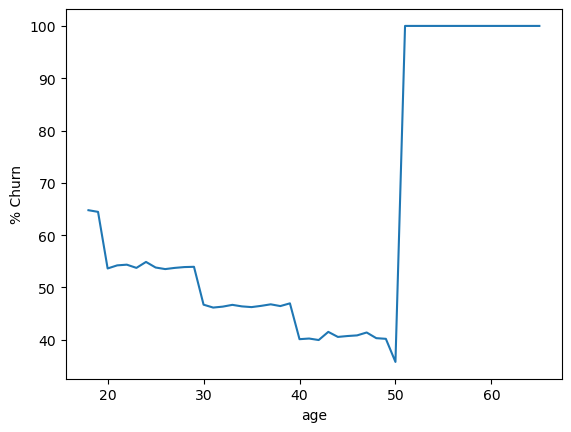

In [34]:
age_churn = pd.pivot_table(df_train[['age', 'churn']], index=['age'],values = ['churn'], 
                           aggfunc= {'churn': ['sum', 'count',]})
age_churn.loc[:,'%'] = (age_churn['churn']['sum']/age_churn['churn']['count'])*100

az = age_churn['%'].plot()
az.set_ylabel("% Churn")


In [35]:
age_churn

churn                   %
      count     sum            
age                            
18.0   8219  5323.0   64.764570
19.0   8073  5203.0   64.449399
20.0   9553  5123.0   53.627133
21.0   9574  5191.0   54.219762
22.0   9639  5239.0   54.352111
23.0   9513  5112.0   53.736991
24.0   9465  5194.0   54.875858
25.0   9647  5191.0   53.809474
26.0   9692  5186.0   53.508048
27.0   9472  5090.0   53.737331
28.0   9608  5178.0   53.892590
29.0   9571  5163.0   53.944206
30.0  10907  5094.0   46.703952
31.0  11092  5119.0   46.150379
32.0  10885  5043.0   46.329812
33.0  10990  5129.0   46.669700
34.0  10829  5022.0   46.375473
35.0  11062  5115.0   46.239378
36.0  11031  5127.0   46.478107
37.0  11024  5156.0   46.770682
38.0  11181  5192.0   46.435918
39.0  10961  5147.0   46.957394
40.0  12417  4980.0   40.106306
41.0  12314  4954.0   40.230632
42.0  12578  5024.0   39.942757
43.0  12298  5104.0   41.502683
44.0  12344  5004.0   40.537913
45.0  12265  4993.0   40.709336
46.0  12368  5050.0   40.831177
47.0  12369  5119.0   41.385722
48.0  12379  4989.0   40.302125
49.0  12331  4954.0   40.175168
50.0  13527  4837.0   35.758113
51.0   5437  5437.0  100.000000
52.0   5364  5364.0  100.000000
53.0   5467  5467.0  100.000000
54.0   5472  5472.0  100.000000
55.0   5489  5489.0  100.000000
56.0   5477  5477.0  100.000000
57.0   5361  5361.0  100.000000
58.0   5373  5373.0  100.000000
59.0   5573  5573.0  100.000000
60.0   5430  5430.0  100.000000
61.0   5407  5407.0  100.000000
62.0   5288  5288.0  100.000000
63.0   5560  5560.0  100.000000
64.0   5496  5496.0  100.000000
65.0   5460  5460.0  100.000000

The churn rate declines steadily until age 50, where the churn rate skyrockets to 100%. 

##### Gender

In [36]:
gender_churn = pd.pivot_table(df_train[['gender', 'churn']], index=['gender'],values = ['churn'], 
                              aggfunc= {'churn': ['sum', 'count',]})
gender_churn.loc[:,'%'] = (gender_churn['churn']['sum']/gender_churn['churn']['count'])*100
#gender_churn['%'] = (gender_churn['sum']/gender_churn['count'])*100
np.round(gender_churn, decimals=2)

churn                %
         count       sum       
gender                         
Female  190580  127058.0  66.67
Male    250252  122941.0  49.13

It seems like a higher proportion of females have churned. Almost 67% of female customers have churned.

##### Tenure

Text(0, 0.5, '% Churn')

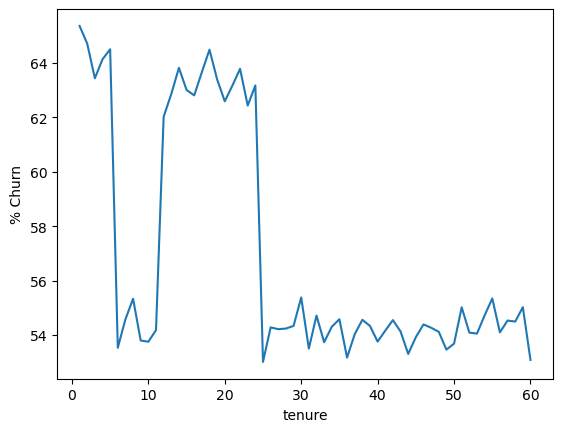

In [37]:
tenure_churn = pd.pivot_table(df_train[['tenure', 'churn']], index=['tenure'],values = ['churn'], 
                              aggfunc= {'churn': ['sum', 'count',]})
tenure_churn.loc[:,'%'] = (tenure_churn['churn']['sum']/tenure_churn['churn']['count'])*100

az = tenure_churn['%'].plot()
az.set_ylabel("% Churn")

In [38]:
np.round(tenure_churn, decimals=2)

churn              %
       count     sum       
tenure                     
1.0     6407  4188.0  65.37
2.0     6575  4255.0  64.71
3.0     6417  4071.0  63.44
4.0     6606  4237.0  64.14
5.0     6669  4302.0  64.51
6.0     7704  4124.0  53.53
7.0     7569  4131.0  54.58
8.0     7670  4244.0  55.33
9.0     7534  4053.0  53.80
10.0    7674  4125.0  53.75
11.0    7671  4156.0  54.18
12.0    6633  4114.0  62.02
13.0    6616  4159.0  62.86
14.0    6637  4236.0  63.82
15.0    6683  4211.0  63.01
16.0    6693  4204.0  62.81
17.0    6630  4221.0  63.67
18.0    6776  4370.0  64.49
19.0    6568  4164.0  63.40
20.0    6678  4180.0  62.59
21.0    6748  4263.0  63.17
22.0    6774  4321.0  63.79
23.0    6581  4109.0  62.44
24.0    6583  4159.0  63.18
25.0    7593  4025.0  53.01
26.0    7605  4128.0  54.28
27.0    7559  4098.0  54.21
28.0    7541  4090.0  54.24
29.0    7500  4075.0  54.33
30.0    7750  4292.0  55.38
31.0    7460  3991.0  53.50
32.0    7828  4283.0  54.71
33.0    7770  4175.0  53.73
34.0    7635  4146.0  54.30
35.0    7611  4154.0  54.58
36.0    7621  4052.0  53.17
37.0    7561  4085.0  54.03
38.0    7733  4219.0  54.56
39.0    7583  4120.0  54.33
40.0    7506  4035.0  53.76
41.0    7633  4134.0  54.16
42.0    7718  4210.0  54.55
43.0    7702  4169.0  54.13
44.0    7628  4066.0  53.30
45.0    7704  4154.0  53.92
46.0    7680  4177.0  54.39
47.0    7747  4204.0  54.27
48.0    7737  4187.0  54.12
49.0    7815  4178.0  53.46
50.0    7634  4098.0  53.68
51.0    7594  4178.0  55.02
52.0    7769  4202.0  54.09
53.0    7665  4143.0  54.05
54.0    7606  4162.0  54.72
55.0    7777  4304.0  55.34
56.0    7812  4226.0  54.10
57.0    7735  4218.0  54.53
58.0    7669  4179.0  54.49
59.0    7597  4180.0  55.02
60.0    7658  4065.0  53.08

For tenure, it seems that there's greater churn for shorter term customers that have been with the product under 25 months. There is a dip between 5 and 11 though - maybe a more desirable length of time to be on the product.

##### Usage Frequency

Text(0, 0.5, '% Churn')

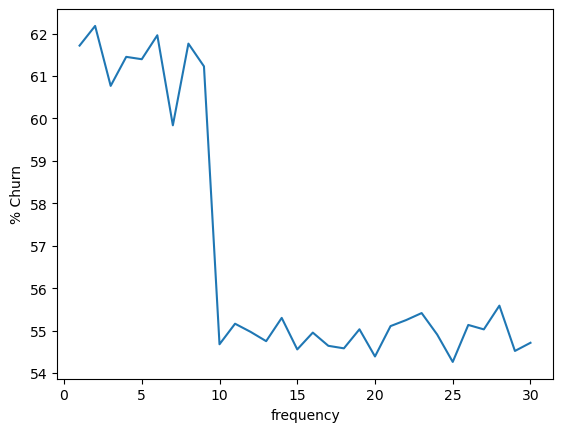

In [39]:
# churn vs usage freq

frequency_churn = pd.pivot_table(df_train[['frequency', 'churn']], index=['frequency'], values = ['churn'], 
                                 aggfunc= {'churn': ['sum', 'count',]})
frequency_churn.loc[:,'%'] = (frequency_churn['churn']['sum']/frequency_churn['churn']['count'])*100

az = frequency_churn['%'].plot()
az.set_ylabel("% Churn")

Similar to tenure, usage frequency seems to have some impact on churn - when the frequency is higher, there's more engagement and potentially less churn which makes sense.

##### Support Calls

Text(0, 0.5, '% Churn')

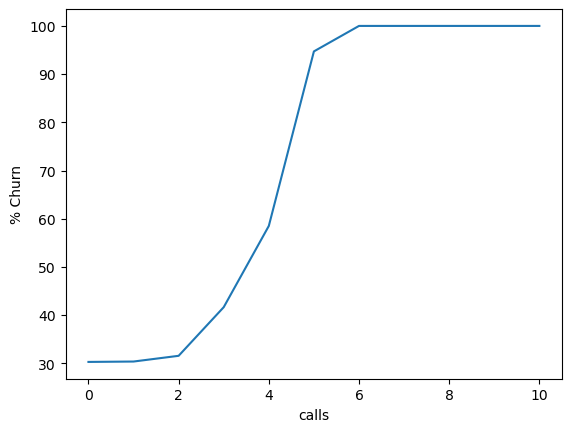

In [40]:
# churn vs calls

calls_churn = pd.pivot_table(df_train[['calls', 'churn']], index=['calls'],values = ['churn'], 
                             aggfunc= {'churn': ['sum', 'count',]})
calls_churn.loc[:,'%'] = (calls_churn['churn']['sum']/calls_churn['churn']['count'])*100

az = calls_churn['%'].plot()
az.set_ylabel("% Churn")

In [41]:
np.round(calls_churn, decimals=2)

churn                %
       count      sum        
calls                        
0.0    69875  21160.0   30.28
1.0    69476  21095.0   30.36
2.0    66571  21004.0   31.55
3.0    52729  21958.0   41.64
4.0    38750  22668.0   58.50
5.0    24918  23601.0   94.71
6.0    23554  23554.0  100.00
7.0    23870  23870.0  100.00
8.0    23559  23559.0  100.00
9.0    23630  23630.0  100.00
10.0   23900  23900.0  100.00

Here it looks like once more than 2 calls are made, the churn rate goes up significantly. This indicates possibly low response from customer support or more issues with using the product.

##### Payment Delay

In [42]:
# churn vs delay
# df_train[['delay', 'churn']].groupby('delay').sum().plot(legend=True)

Text(0, 0.5, '% Churn')

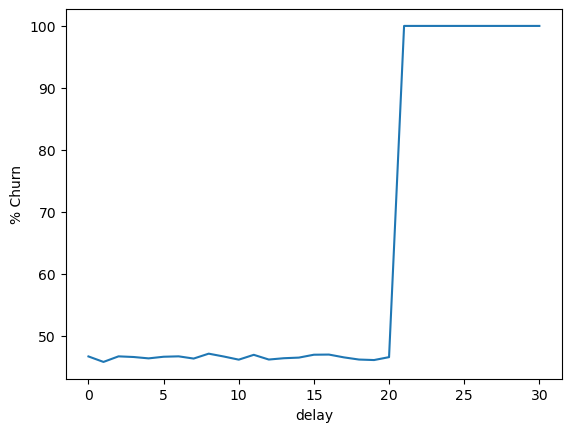

In [43]:
# churn vs delay

delay_churn = pd.pivot_table(df_train[['delay', 'churn']], index=['delay'],values = ['churn'], 
                             aggfunc= {'churn': ['sum', 'count',]})
delay_churn.loc[:,'%'] = (delay_churn['churn']['sum']/delay_churn['churn']['count'])*100

az = delay_churn['%'].plot()
az.set_ylabel("% Churn")

In [44]:
np.round(delay_churn, decimals=2)

churn               %
       count     sum        
delay                       
0.0    16904  7889.0   46.67
1.0    17021  7793.0   45.78
2.0    16822  7853.0   46.68
3.0    17025  7930.0   46.58
4.0    16938  7852.0   46.36
5.0    16744  7806.0   46.62
6.0    16954  7915.0   46.69
7.0    17027  7888.0   46.33
8.0    16892  7959.0   47.12
9.0    16869  7871.0   46.66
10.0   17051  7869.0   46.15
11.0   17185  8065.0   46.93
12.0   17198  7940.0   46.17
13.0   17095  7929.0   46.38
14.0   17078  7938.0   46.48
15.0   17015  7988.0   46.95
16.0   17021  7995.0   46.97
17.0   16869  7847.0   46.52
18.0   17027  7861.0   46.17
19.0   16892  7785.0   46.09
20.0   17175  7996.0   46.56
21.0    8670  8670.0  100.00
22.0    8454  8454.0  100.00
23.0    8323  8323.0  100.00
24.0    8325  8325.0  100.00
25.0    8362  8362.0  100.00
26.0    8383  8383.0  100.00
27.0    8178  8178.0  100.00
28.0    8299  8299.0  100.00
29.0    8446  8446.0  100.00
30.0    8590  8590.0  100.00

Seems like greater delays (assuming in days) leads to directionally, higher churn rates. Customers who had more than a 20 day delay almost always churned. Longer time to pay could lead to less engagement with the product/less inclination to continue with the contract. 

##### Subscription Type

In [45]:
subscription_churn = pd.pivot_table(df_train[['subscription', 'churn']], 
                                    index=['subscription'],values = ['churn'], aggfunc= {'churn': ['sum', 'count',]})
subscription_churn.loc[:,'%'] = (subscription_churn['churn']['sum']/subscription_churn['churn']['count'])*100

np.round(subscription_churn, decimals=2)

churn               %
               count      sum       
subscription                        
Basic         143026  83210.0  58.18
Premium       148678  83173.0  55.94
Standard      149128  83616.0  56.07

Not as much association here - seems like the subscription plan doesn't really impact whether someone churns or not. Around the same proportion (55-58%) of people for each plan churn. Not really a great sign since this is more than half of customers for each plan.

QUESTION: is there a timeframe for this dataset?

##### Contract Length

In [46]:
contractlength_churn = pd.pivot_table(df_train[['contractlength', 'churn']], 
                                      index=['contractlength'],values = ['churn'], 
                                      aggfunc= {'churn': ['sum', 'count',]})
contractlength_churn.loc[:,'%'] = (contractlength_churn['churn']['sum']/contractlength_churn['churn']['count'])*100

np.round(contractlength_churn, decimals=2)

churn                %
                 count      sum        
contractlength                         
Annual          177198  81646.0   46.08
Monthly          87104  87104.0  100.00
Quarterly       176530  81249.0   46.03

It seems that all customers on the monthly contract have churned. Model that's built based on this could impact the test data results if there were people who were on monthly contract but did not churn.

##### Total Spend

Grouped spend to see trends more easily

In [47]:
# group spend in 200s - train

df_train.loc[(df_train['spend'] >= 0) & (df_train['spend'] < 200), 'spend_group'] = "0-199"
df_train.loc[(df_train['spend'] >= 200) & (df_train['spend'] < 400), 'spend_group'] = "200-399"
df_train.loc[(df_train['spend'] >= 400) & (df_train['spend'] < 600), 'spend_group'] = "400-599"
df_train.loc[(df_train['spend'] >= 600) & (df_train['spend'] < 800), 'spend_group'] = "600-799"
df_train.loc[(df_train['spend'] >= 800) & (df_train['spend'] <= 1000), 'spend_group'] = "800-1000"

# group spend in 200s - test

df_test.loc[(df_test['spend'] >= 0) & (df_test['spend'] < 200), 'spend_group'] = "0-199"
df_test.loc[(df_test['spend'] >= 200) & (df_test['spend'] < 400), 'spend_group'] = "200-399"
df_test.loc[(df_test['spend'] >= 400) & (df_test['spend'] < 600), 'spend_group'] = "400-599"
df_test.loc[(df_test['spend'] >= 600) & (df_test['spend'] < 800), 'spend_group'] = "600-799"
df_test.loc[(df_test['spend'] >= 800) & (df_test['spend'] <= 1000), 'spend_group'] = "800-1000"

In [48]:
spend_group_churn = pd.pivot_table(df_train[['spend_group', 'churn']], index=['spend_group'],values = ['churn'], aggfunc= {'churn': ['sum', 'count',]})
spend_group_churn.loc[:,'%'] = (spend_group_churn['churn']['sum']/spend_group_churn['churn']['count'])*100
#gender_churn['%'] = (gender_churn['sum']/gender_churn['count'])*100
spend_group_churn

churn                    %
              count      sum            
spend_group                             
0-199         28705  28705.0  100.000000
200-399       57930  57930.0  100.000000
400-599       94349  56180.0   59.544881
600-799      130091  53742.0   41.311082
800-1000     129757  53442.0   41.186217

In [49]:
spend_group_churn = pd.pivot_table(df_test[['spend_group', 'churn']], index=['spend_group'],values = ['churn'], aggfunc= {'churn': ['sum', 'count',]})
spend_group_churn.loc[:,'%'] = (spend_group_churn['churn']['sum']/spend_group_churn['churn']['count'])*100
#gender_churn['%'] = (gender_churn['sum']/gender_churn['count'])*100
spend_group_churn

churn                  %
             count     sum           
spend_group                          
0-199         7544  3975.0  52.690880
200-399      14869  7711.0  51.859574
400-599      14308  6835.0  47.770478
600-799      13707  5980.0  43.627344
800-1000     13930  5991.0  43.007897

It seems that the customers who have lower spend, specifically under 400 will likely churn. This is 100% but not so for the testing data - distribution is closer (43-52%).

##### Last Interaction

In [50]:
# lastinteraction
#df_train[['lastinteraction', 'churn']].groupby('lastinteraction').sum().plot(legend=True)

Text(0, 0.5, '% Churn')

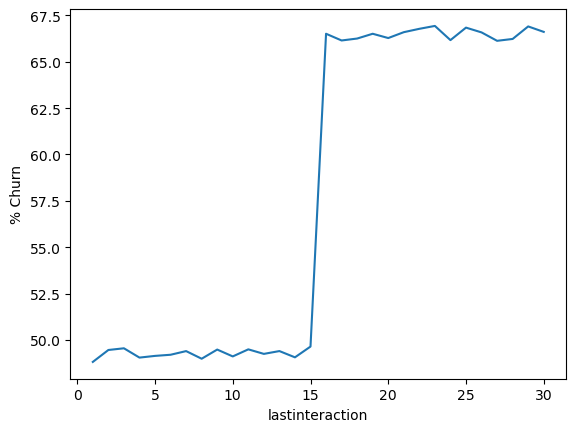

In [51]:
lastinteraction_churn = pd.pivot_table(df_train[['lastinteraction', 'churn']], index=['lastinteraction'],
                                       values = ['churn'], aggfunc= {'churn': ['sum', 'count',]})
lastinteraction_churn.loc[:,'%'] = (lastinteraction_churn['churn']['sum']/lastinteraction_churn['churn']['count'])*100
#gender_churn['%'] = (gender_churn['sum']/gender_churn['count'])*100
az = lastinteraction_churn['%'].plot()
az.set_ylabel("% Churn")

Seems like the longer back there was interaction, specifically after 15 days, the significantly greater the likelihood of churn

## Set up Datasets

Below we set up the categorical variables, converting them to numerical codes. Then, I set up the X and y training and test sets. I dropped the customer id and spend_group since id is a unique identifier and spend is already in the dataset.

In [52]:
# convert object fields to categorical values for train
df_train['gender'] = df_train['gender'].astype('category').cat.codes # 0 - female, 1 - male
df_train['subscription'] = df_train['subscription'].astype('category').cat.codes # 0 - Basic, 1 - Prem, 2 - Standard
df_train['contractlength'] = df_train['contractlength'].astype('category').cat.codes # 0 - Annual, 1 - Monthly, 2 - Quarterly
df_train['spend_group'] = df_train['spend_group'].astype('category').cat.codes # 0 - Annual, 1 - Monthly, 2 - Quarterly


# convert object fields to categorical values for test
df_test['gender'] = df_test['gender'].astype('category').cat.codes # 0 - female, 1 - male
df_test['subscription'] = df_test['subscription'].astype('category').cat.codes # 0 - Basic, 1 - Prem, 2 - Standard
df_test['contractlength'] = df_test['contractlength'].astype('category').cat.codes # 0 - Annual, 1 - Monthly, 2 - Quarterly
df_test['spend_group'] = df_test['spend_group'].astype('category').cat.codes

In [53]:
df_overall = pd.concat([df_train, df_test], axis=0) 
X = df_overall.drop(columns=['id', 'churn'])
y = df_overall['churn']

In [54]:
X_train = df_train.drop(columns=['id', 'churn', 'spend_group']) # dropped customer id # try spend group later
y_train = df_train['churn']
X_test = df_test.drop(columns=['id', 'churn', 'spend_group'])
y_test = df_test['churn']

## Modeling

### Method 1: Logistic Regression

Here we look at the feature importance first

<Axes: ylabel='Feature'>

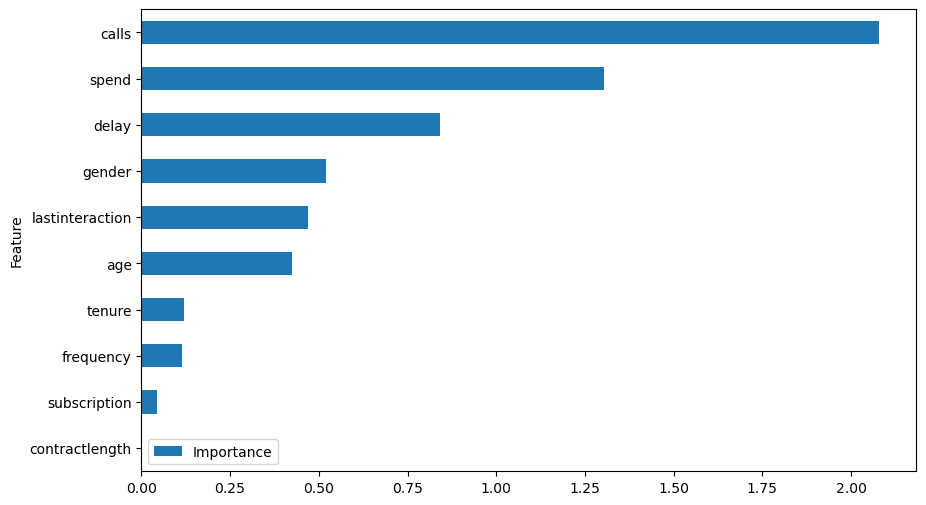

In [55]:
# for training set only
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train_s, y_train)


coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

Model and report accuracy - first scaled the dataset

In [56]:
import numpy as np # based on coefficients of model THIS 70.6%
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics


scaler = preprocessing.StandardScaler().fit(X_train[['gender', 'calls', 'delay', 'spend', 'lastinteraction']])
X_train_scaled = scaler.transform(X_train[['gender', 'calls', 'delay', 'spend', 'lastinteraction']])
scaler = preprocessing.StandardScaler().fit(X_test[['gender', 'calls', 'delay', 'spend', 'lastinteraction']])

X_test_scaled = scaler.transform(X_test[['gender', 'calls', 'delay', 'spend', 'lastinteraction']])

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
coefficients = model.coef_

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test_scaled)
y_val = y_test
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

y_pred_proba = model.predict_proba(X_test_scaled)[::,1]

#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

Accuracy: 0.6904036794182541
Precision: 0.6273040503096162
Recall: 0.853830512921422
F1 score: 0.7232446697687339


0.7724436270111604

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

Cross-Validation Accuracy Scores [0.84572459 0.84883233 0.84871719 0.8490688  0.84963591]


(0.845724590833305, 0.8483957658123986, 0.8496359140711839)

General accuracy range is around 84% based on cross-validation - on this test set, it's 69-70%. Not necessarily representative of the test data.

### Method 2: Decision Tree

In [59]:
# decision trees
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train[['gender', 'calls', 'delay', 'tenure', 'frequency']], y_train)

res_pred = decision_tree.predict(X_test[['gender', 'calls', 'delay', 'tenure', 'frequency']])
accuracy_score(y_test, res_pred)

0.6195810932595792

### Method 3: Extra Trees

In [60]:
# extra trees - Random Forests build multiple decision trees over bootstrapped subsets of 
# the data (samples with replacement), whereas Extra Trees algorithms build multiple decision trees 
# over the entire dataset
# https://www.baeldung.com/cs/random-forest-vs-extremely-randomized-trees#:~:text=
# Random%20Forests%20build%20multiple%20decision,ET%20randomizes%20the%20node%20split.

from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators = 3, criterion = 'entropy') #In decision tree, it helps model in selection
# of feature for splitting, at the node by measuring the purity of the split.
model.fit(X_train,y_train)
model.score(X_train,y_train)

cross_val_score(model, X_train, y_train, cv = 5)


array([0.98608323, 0.98565223, 0.98804528, 0.98492616, 0.98683166])

<Axes: ylabel='allvarlist'>

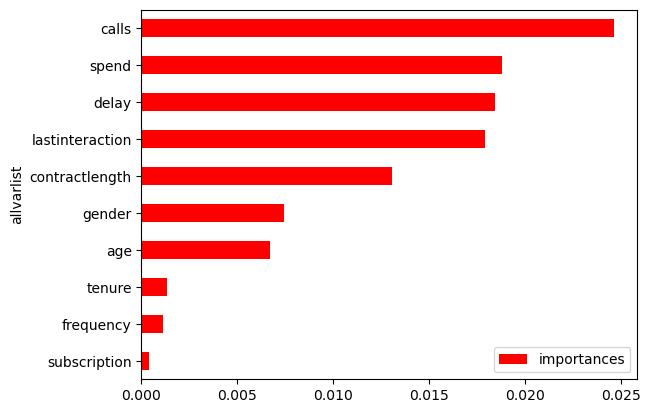

In [61]:
feature_importance = model.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in model.estimators_], axis = 0)

df3=pd.DataFrame({'allvarlist':X_train.columns,'importances':feature_importance_normalized})
df3.sort_values('importances',inplace=True)
df3.plot(kind='barh',y='importances',x='allvarlist',color='r')

In [62]:
y_pred = (model.predict_proba(X_test)[:,1] >= 0.5).astype(bool)
metrics.accuracy_score(y_test, y_pred)

0.5118089437210603

Logistic Regression model performs better overall. Below, we look at the overall correlation between each pair of variables.

### Comparing Associations

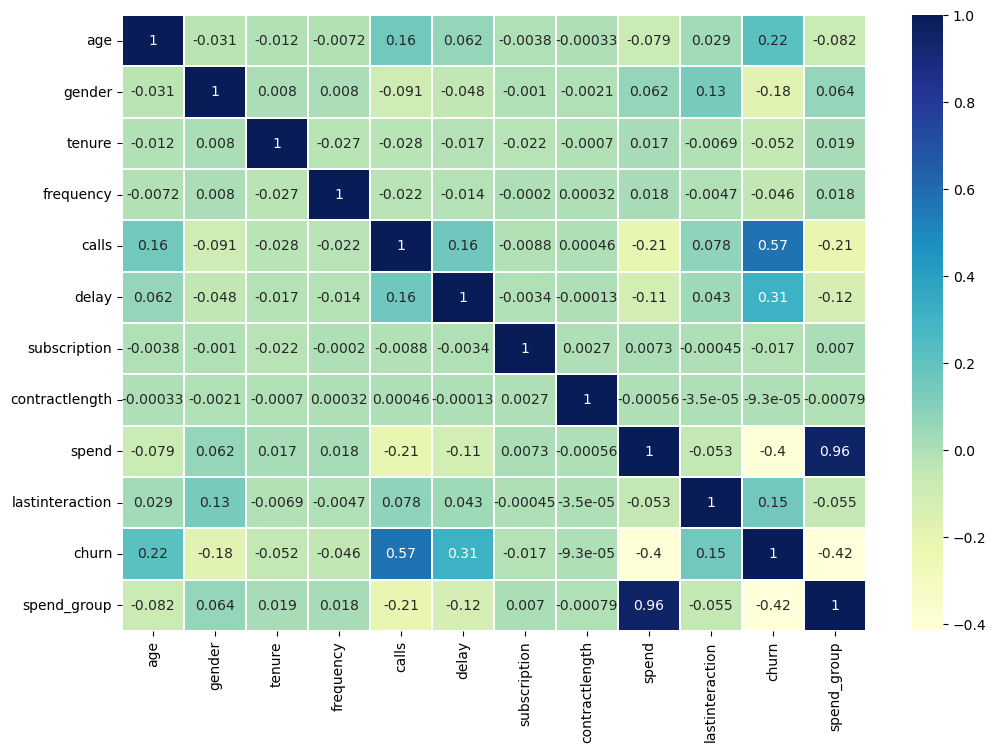

In [63]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df_train.columns:
    df_train[column] = labelencoder.fit_transform(df_train[column])
plt.figure(figsize=(12,8))
sns.heatmap(df_train.drop(columns = ['id']).corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

From both the modeling and the correlation heatmap above, it seems that the top indicators of churn are calls, delay, and spend. Calls has the strongest association with churn at 0.57, followed by spend (inverse relationship at -0.4), and then payment delay at 0.31. 

### Appendix 

In [64]:
# contractlength_churn = pd.pivot_table(df_train[['calls', 'delay', 'churn']], 
# index=[ 'calls', 'delay'],values = ['churn'], aggfunc= {'churn': ['sum', 'count',]})
# contractlength_churn.loc[:,'%'] = (contractlength_churn['churn']['sum']/contractlength_churn['churn']['count'])*100

# print(contractlength_churn.to_string())

# # calls and spend


In [65]:
# df_overall = pd.concat([df_train, df_test], axis=0) 

# contractlength_churn = pd.pivot_table(df_train[['lastinteraction',  'churn']], 
# index=[ 'lastinteraction'],values = ['churn'], aggfunc= {'churn': ['sum', 'count',]})
# contractlength_churn.loc[:,'%'] = (contractlength_churn['churn']['sum']/contractlength_churn['churn']['count'])*100

# contractlength_churn
# print(contractlength_churn.to_string())

# calls and spend


In [66]:
# df_overall = pd.concat([df_train, df_test], axis=0) 

# contractlength_churn = pd.pivot_table(df_overall[['spend' ,'churn']], index=['spend'],
# values = ['churn'], aggfunc= {'churn': ['sum', 'count',]})
# contractlength_churn.loc[:,'%'] = (contractlength_churn['churn']['sum']/contractlength_churn['churn']['count'])*100

# calls and spend


In [67]:
#c = df_train['contractlength'].astype('category')

#d = dict(enumerate(c.cat.categories))
# print (d)

In [68]:
# # for test set only
# scaler = StandardScaler()

# X_test_s = scaler.fit_transform(X_test)

# model = LogisticRegression()
# model.fit(X_test_s, y_test)


# coefficients = model.coef_[0]

# feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': np.abs(coefficients)})
# feature_importance = feature_importance.sort_values('Importance', ascending=True)
# feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [69]:
# # for whole dataset
# scaler = StandardScaler()
# X_train_s = scaler.fit_transform(X)

# model = LogisticRegression()
# model.fit(X_train_s, y)


# coefficients = model.coef_[0]

# feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
# feature_importance = feature_importance.sort_values('Importance', ascending=True)
# feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
# # loyalty programs only if most customers who churned are on shorter contract lengths

In [70]:
# import numpy as np # based on coefficients of model THIS 70.6%
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn import preprocessing
# from sklearn import metrics


# scaler = preprocessing.StandardScaler().fit(X_train[['gender', 'calls', 'delay', 'tenure', 'frequency']])
# X_train_scaled = scaler.transform(X_train[['gender', 'calls', 'delay', 'tenure', 'frequency']])
# scaler = preprocessing.StandardScaler().fit(X_test[['gender', 'calls', 'delay', 'tenure', 'frequency']])

# X_test_scaled = scaler.transform(X_test[['gender', 'calls', 'delay', 'tenure', 'frequency']])

# model = LogisticRegression()
# model.fit(X_train_scaled, y_train)
# coefficients = model.coef_

In [71]:
# # set up training and validation set
# from sklearn.model_selection import train_test_split

# x_train_1, x_val, y_train_1, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=4)

In [72]:
# import numpy as np # apply cross-val to separate validation set here
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn import preprocessing
# from sklearn import metrics


# scaler = preprocessing.StandardScaler().fit(x_train_1[['gender', 'calls', 'delay', 'spend', 'lastinteraction']])
# X_train_scaled = scaler.transform(x_train_1[['gender', 'calls', 'delay', 'spend', 'lastinteraction']])
# scaler = preprocessing.StandardScaler().fit(x_val[['gender', 'calls', 'delay', 'spend', 'lastinteraction']])

# X_val_scaled = scaler.transform(x_val[['gender', 'calls', 'delay', 'spend', 'lastinteraction']])

# model = LogisticRegression()
# model.fit(X_train_scaled, y_train_1)
# coefficients = model.coef_


# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(model, x_val, y_val, cv=5)
# print('Cross-Validation Accuracy Scores', scores)
# scores = pd.Series(scores)
# scores.min(), scores.mean(), scores.max()